# Análisis de los 25 retailers más grandes de Estados Unidos
#### by Joel Barrantes

<center><img src="/img/USA_shopping_reveriechaser.jpg" width=700></center>
<center><span>Fuente: imagen de reveriechaser.com</span></center>


**Retail** es el sector económico de empresas que se especializan en comercialización masiva de productos o servicios uniformes a grandes cantidades de clientes. Por ejemplo Walmart, Amazon, Target, Home Depot, Best Buy, etc

Dentro de este dataset se tiene las siguientes variables/columnas los cuales usaremos para realizar un analisis y responder preguntas de negocio:

- Company (compañía)
- Sales (ventas en millones de dólares)
- Stores (cantidad de tiendas físicas)
- Sales/Avg. Store (promedio de venta por tienda física)
- Category (categoría)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp

In [2]:
# Importar datos aquí
dataset = pd.read_csv("./database/largest_us_retailers.csv", delimiter=",")
dataset


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


### Realizando una breve inspeccion de los datos que se tiene

#### El siguiente Dashboard tiene la finalidad para mostrar el contexto de los datos

### Consulta en SQL para obtener la 5 empresas con mayores ventas

### Debido a que el dataset tiene missing values y outlier, voy a aplicar algunas tecnicas de ETL como imputacion de datos y corte para valores por encima del limite superior 

* limite superior: $Q3 + 1.5*f(IQR)$ 

#### Cantidad de missing values por columnas

In [3]:
dataset.isnull().sum()

Company               0
Sales                 0
Stores                2
Sales/Avg. Store      2
Store Count Growth    2
Category              1
dtype: int64

### Usando una funcion para limpiar mis datos, luego aplicandolo en mi dataset y creando una nueva instancia con el mismo nombre

In [4]:
def applying_etl_for_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """just droping duplicate, sorting and imputing missing values"""
    df = df.loc[:,~df.columns.duplicated()].dropna(axis=1,thresh=1)
    df = df.sort_values(by=['Sales'], ascending=False)
    df = df.interpolate(method ='linear', limit_direction ='forward')
    df.fillna("Electronic/Mail Order", inplace=True)
    df.rename(columns=lambda x: x.strip().lower(), inplace=True)
    df['sales/avg. store'] = df['sales/avg. store'].astype(float).round(1)
    df['store count growth'] = df['store count growth'].astype(float).round(5)
    df['company'] = df['company'].str.strip()
    df['sales'] = df['sales'].astype(int)
    df['stores'] = df['stores'].astype(int)
    return df

In [5]:
dataset = applying_etl_for_dataset(df=dataset)

### Cortando los datos para quitar el outlier y crear una nueva instancia del objeto dataset

Esta nueva instancia se llamara df y es con la que realizare las preguntas de negocio

In [6]:
df = dataset.iloc[1:-1]

### Como se puede ver en la siguiente ejecución de codigo, ya no tengo missing values

#### tener en cuenta que tengo dos objetos con los que voy trabajar
* dataset: el objeto que tiene todos los datos
* df: el objeto solo tiene datos sin el outlier identificado como **Walmart US**

In [7]:
dataset.isnull().sum()

company               0
sales                 0
stores                0
sales/avg. store      0
store count growth    0
category              0
dtype: int64

In [8]:
df.isnull().sum()

company               0
sales                 0
stores                0
sales/avg. store      0
store count growth    0
category              0
dtype: int64

In [9]:
dataset

,company,sales,stores,sales/avg. store,store count growth,category
0,Walmart US,658119,4574,65.6,0.01284,Supercenters
1,Kroger,115037,3931,30.0,0.05389,Grocery
2,Costco,90048,495,187.8,0.06681,Warehouse Club
3,Home Depot,83976,1965,42.7,0.00000,Home Improvement
4,Walgreen Boots,78924,8002,9.8,-0.01051,Drug Stores
5,CVS incl. Target,77792,9813,8.8,0.25566,Drug Stores
6,Amazon,71687,5792,24.4,0.12280,Electronic/Mail Order
7,Target,71208,1772,40.0,-0.01006,Supercenters
8,Lowe's,60311,1828,33.3,0.01952,Home Improvement
9,Albertsons,56829,2326,23.9,-0.04437,Grocery


In [10]:
df

,company,sales,stores,sales/avg. store,store count growth,category
1,Kroger,115037,3931,30.0,0.05389,Grocery
2,Costco,90048,495,187.8,0.06681,Warehouse Club
3,Home Depot,83976,1965,42.7,0.00000,Home Improvement
4,Walgreen Boots,78924,8002,9.8,-0.01051,Drug Stores
5,CVS incl. Target,77792,9813,8.8,0.25566,Drug Stores
6,Amazon,71687,5792,24.4,0.12280,Electronic/Mail Order
7,Target,71208,1772,40.0,-0.01006,Supercenters
8,Lowe's,60311,1828,33.3,0.01952,Home Improvement
9,Albertsons,56829,2326,23.9,-0.04437,Grocery
10,Sam's Club,56828,655,87.3,0.01236,Warehouse Clubs


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

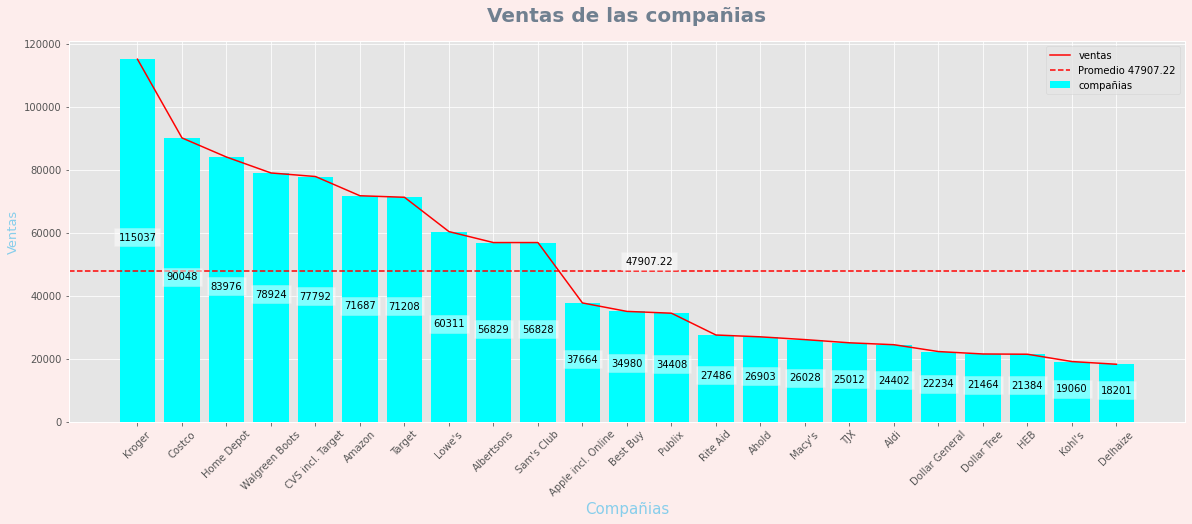

In [11]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], horizontalalignment="center",
                 bbox = dict(facecolor = 'white', alpha = .5))

plt.style.use('ggplot')
company_names = df['company'].values
sales = df['sales'].values
mean = round(df['sales'].mean(),2)

fig, axis = plt.subplots(facecolor = '#FDEDEC')
fig.set_size_inches(20, 7)
axis.bar(company_names, sales, color="cyan", label='compañias')
axis.plot(company_names, sales, color="red", label='ventas')
plt.axhline(sales.mean(), color="r", linestyle="--", label=f'Promedio {mean}')
plt.xticks(rotation=45)
plt.legend()
plt.style.use('ggplot')
axis.text(
    len(company_names)/2, sales.mean() + 2000, mean, 
    horizontalalignment="center",bbox = dict(facecolor = 'white', alpha = .5))
plt.xlabel('Compañias', fontsize=15, color="skyblue")
plt.ylabel('Ventas', fontsize=13, color="skyblue")
plt.title('Ventas de las compañias', fontsize=20, color="slategrey", fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
addlabels(company_names, sales)

In [12]:
number_above_mean = len(df[df['sales']>=sales.mean()])
print(f"Son {number_above_mean} las empresas que vendieron mayor que el promedio y son:")

for company in df[df['sales']>=sales.mean()]['company'].values:
    print(company, end=', ')


Son 10 las empresas que vendieron mayor que el promedio y son:
Kroger, Costco, Home Depot, Walgreen Boots, CVS incl. Target, Amazon, Target, Lowe's, Albertsons, Sam's Club, 

In [13]:
number_above_mean = len(df[df['sales'] < sales.mean()])
print(f"Son {number_above_mean} las empresas que vendieron menos que el promedio y son:")

for company in df[df['sales'] < sales.mean()]['company'].values:
    print(company, end=', ')

Son 13 las empresas que vendieron menos que el promedio y son:
Apple incl. Online, Best Buy, Publix, Rite Aid, Ahold, Macy's, TJX, Aldi, Dollar General, Dollar Tree, HEB, Kohl's, Delhaize, 

**Resultados:**
* la venta promedio de todas la empresas sin contar sin contar la compañia dominantes es : 47907.22


**Conclusiones:**
* 10 empresas estan por encima del promedio
* 13 empresas estan por debajo del promedio

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

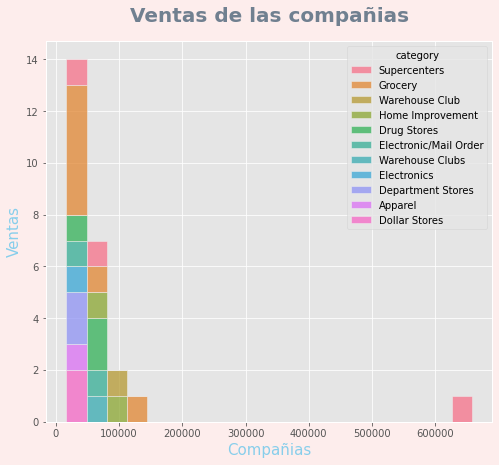

la categoria con mas ventas es Grocery


In [14]:
fig, ax=plt.subplots(facecolor = '#FDEDEC')
fig.set_size_inches(8, 7)
sns.histplot(dataset, x='sales',  hue='category', multiple='stack')
plt.xlabel('Compañias', fontsize=15, color="skyblue")
plt.ylabel('Ventas', fontsize=15, color="skyblue")
plt.title('Ventas de las compañias', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.show()

print('la categoria con mas ventas es Grocery')

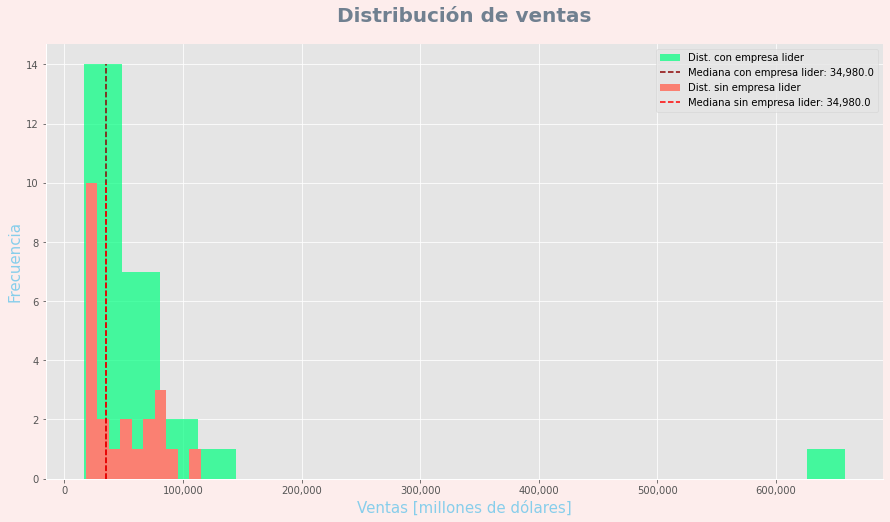

In [15]:
average = round(df['sales'].mean(),2)

fig = plt.figure(figsize=(15,8), facecolor = '#FDEDEC')
plt.style.use('ggplot')

ax1 = fig.add_subplot(111)
median = dataset['sales'].median() 
counts, bins, _ = ax1.hist(dataset['sales'], bins=20, color='springgreen', alpha=0.7, label='Dist. con empresa lider')
ax1.vlines(x=median, linestyle='dashed', ymin=0, ymax=counts[0], color='darkred',
            label='Mediana con empresa lider: {:,.1f}'.format(median))
plt.xlabel('Frecuencia', fontsize=15, color="skyblue")
plt.ylabel('Ventas [millones de dólares]', fontsize=15, color="skyblue")
plt.title('Distribución de ventas', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
ax1.xaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.legend(loc='best')

median_without_top = df['sales'].median() 
counts, bins, _ = ax1.hist(df['sales'], bins=10, color='salmon', label='Dist. sin empresa lider')
ax1.vlines(x=median_without_top, linestyle='dashed', ymin=0, ymax=counts[0], color='red',
            label='Mediana sin empresa lider: {:,.1f}'.format(median))
plt.title('Distribución de ventas', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")           
plt.xlabel('Ventas [millones de dólares]', fontsize=15, color="skyblue")
plt.ylabel('Frecuencia', fontsize=15, color="skyblue")
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(mlp.ticker.StrMethodFormatter('{x:,.0f}'))
sns.despine(right=True)
plt.show()

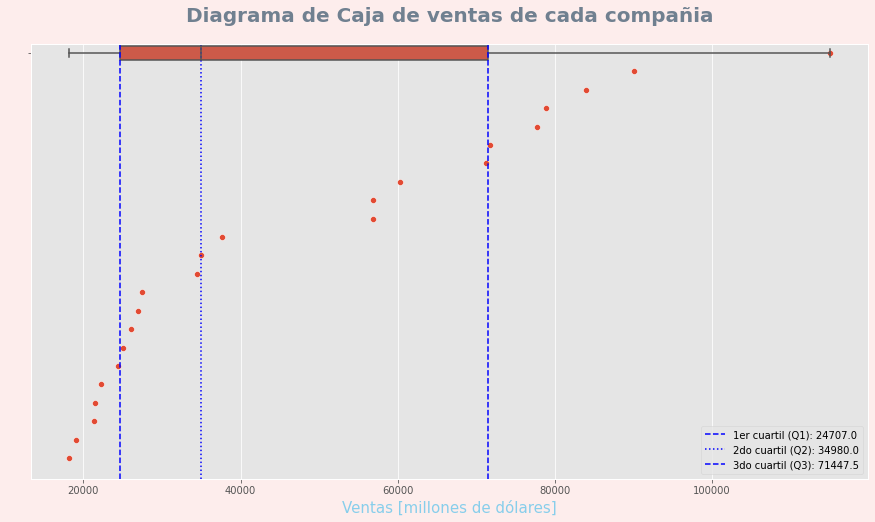

In [16]:
Q1 = df['sales'].quantile(q=0.25)
Q2 = df['sales'].quantile(q=0.5)
Q3 = df['sales'].quantile(q=0.75)

plt.style.use('ggplot')
fig, ax = plt.subplots(facecolor = '#FDEDEC')
fig.set_size_inches(15, 8)
sns.boxplot(x = 'sales', data = df)
sns.scatterplot(x = 'sales', y = 'company', data = df)
plt.axvline(Q1, color="b", linestyle="--", label=f'1er cuartil (Q1): {Q1}')
plt.axvline(Q2, color="b", linestyle="dotted", label=f'2do cuartil (Q2): {Q2}') 
plt.axvline(Q3, color="b", linestyle="--", label=f'3do cuartil (Q3): {Q3}')
plt.legend(loc='best')
plt.title('Diagrama de Caja de ventas de cada compañia', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center") 
plt.xlabel('Ventas [millones de dólares]', fontsize=15, color="skyblue")
plt.ylabel(' ')

plt.show()

In [17]:
Q1 = df['sales'].quantile(q=0.25)
Q2 = df['sales'].quantile(q=0.5)
Q3 = df['sales'].quantile(q=0.75)
number_of_companies = len(df[df['sales'] > Q1])
print(f"la mayoria de las empresas al menos generaron mas de {Q1} y son en total {number_of_companies}")

for company in df[df['sales'] > Q1]['company'].values:
    print(company, end=', ')

la mayoria de las empresas al menos generaron mas de 24707.0 y son en total 17
Kroger, Costco, Home Depot, Walgreen Boots, CVS incl. Target, Amazon, Target, Lowe's, Albertsons, Sam's Club, Apple incl. Online, Best Buy, Publix, Rite Aid, Ahold, Macy's, TJX, 

**Resultados:**
* la mayoria de las empresas al menos generaron mas de 24707.0 y son en total 17
* el rango de dinero en ventas donde la mayoria de la compañias estan es 24707.0 y 71447.5


**Conclusiones:**
* la categoria con mas ventas es Grocery

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

la categoria Grocery es quien tiene mas tiendas


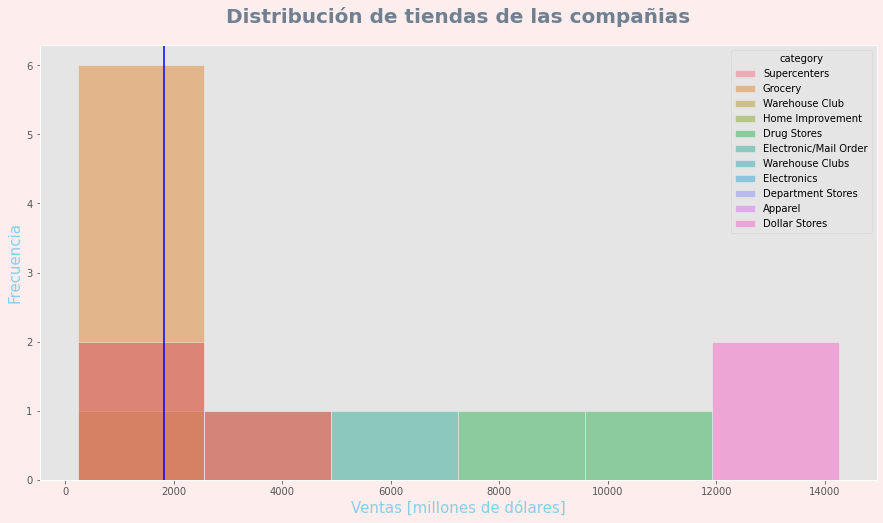

In [18]:
plt.style.use('ggplot')
fig,ax= plt.subplots(facecolor = '#FDEDEC')
fig.set_size_inches(15, 8)
mediana = dataset['stores'].median()
sns.histplot(data=dataset,x='stores', hue='category')
ax.axvline(mediana,0,10,color='blue',label='Mediana %s'%mediana)
ax.grid()
plt.title('Distribución de tiendas de las compañias', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")           
plt.xlabel('Ventas [millones de dólares]', fontsize=15, color="skyblue")
plt.ylabel('Frecuencia', fontsize=15, color="skyblue")
dataset.stores.min()
print('la categoria Grocery es quien tiene mas tiendas')

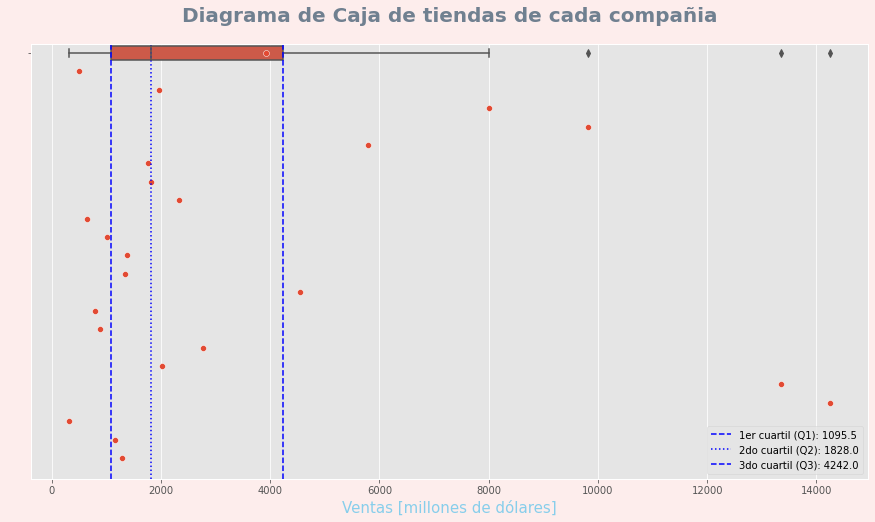

In [19]:
Q1 = df['stores'].quantile(q=0.25)
Q2 = df['stores'].quantile(q=0.5)
Q3 = df['stores'].quantile(q=0.75)

fig, ax = plt.subplots(facecolor = '#FDEDEC')
fig.set_size_inches(15, 8)
sns.boxplot(x = 'stores', data = df)
sns.scatterplot(x = 'stores', y = 'company', data = df)
plt.axvline(Q1, color="b", linestyle="--", label=f'1er cuartil (Q1): {Q1}')
plt.axvline(Q2, color="b", linestyle="dotted", label=f'2do cuartil (Q2): {Q2}') 
plt.axvline(Q3, color="b", linestyle="--", label=f'3do cuartil (Q3): {Q3}')
plt.legend(loc='best')
plt.title('Diagrama de Caja de tiendas de cada compañia', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")           
plt.xlabel('Ventas [millones de dólares]', fontsize=15, color="skyblue")
plt.ylabel(' ')
ax1.legend(loc='best')

plt.show()

In [20]:
Q1 = df['stores'].quantile(q=0.25)
Q2 = df['stores'].quantile(q=0.5)
Q3 = df['stores'].quantile(q=0.75)
number_of_companies = len(df[df['stores'] > Q1])
print(f"la mayoria de las empresas al menos tienen mas de {Q1} y son en total {number_of_companies}")

for company in df[df['stores'] > Q1]['company'].values:
    print(company, end=', ')

la mayoria de las empresas al menos tienen mas de 1095.5 y son en total 17
Kroger, Home Depot, Walgreen Boots, CVS incl. Target, Amazon, Target, Lowe's, Albertsons, Best Buy, Publix, Rite Aid, TJX, Aldi, Dollar General, Dollar Tree, Kohl's, Delhaize, 

**Resultados:**
* la mayoria de las empresas al menos tienen mas de 1095.5 y son en total 17
* la mayoria de las compañias tienen entre 1095 y 4242 tiendas


**Conclusiones:**
* la categoria con mas tiendas es Grocery, lo cual tiene mucho sentido porque las alimentos son los productos que se consumen dia a dia sin importar el nivel socioeconomico o cultural.

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

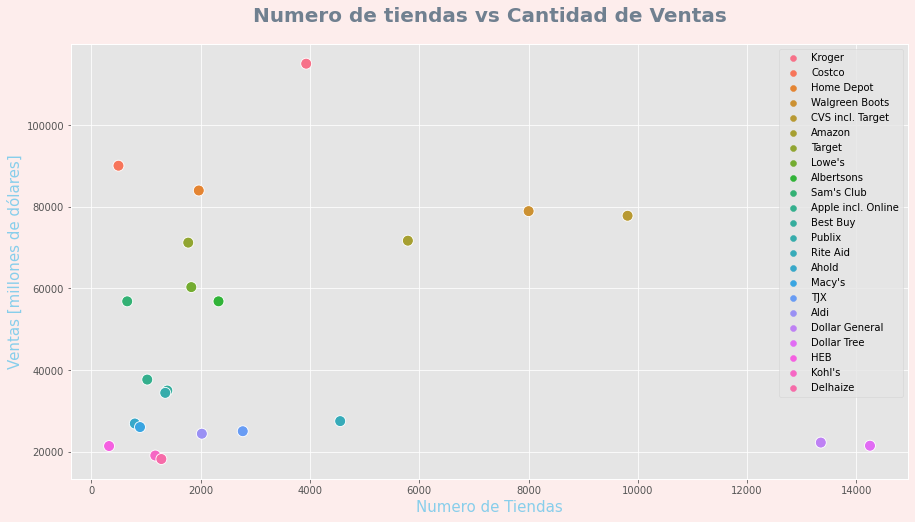

In [21]:
fig, ax = plt.subplots(facecolor = '#FDEDEC')
fig.set_size_inches(15, 8)
sns.scatterplot(data=df, x = 'stores', y = 'sales', hue='company', s=120)
plt.legend(loc='best')
plt.title('Numero de tiendas vs Cantidad de Ventas', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")           
plt.xlabel('Numero de Tiendas', fontsize=15, color="skyblue")
plt.ylabel('Ventas [millones de dólares]', fontsize=15, color="skyblue")
ax1.legend(loc='best')
plt.show()

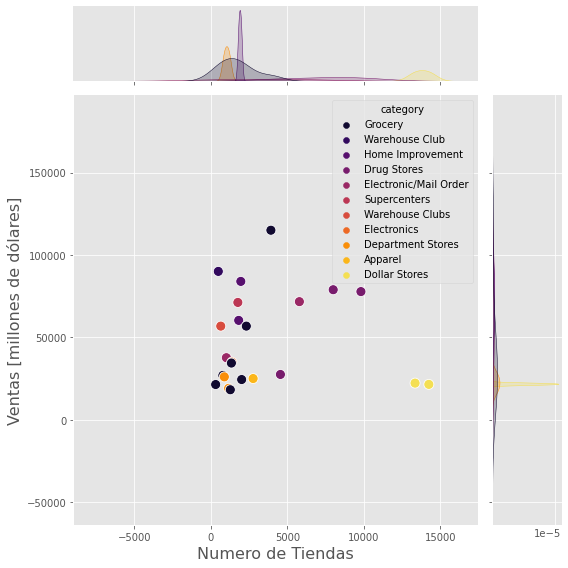

In [22]:
ax = sns.jointplot(data=df, x = 'stores', y = 'sales', hue = 'category', s=100,palette='inferno', height=8)
ax.set_axis_labels('Numero de Tiendas', 'Ventas [millones de dólares]', fontsize=16)
ax.ax_marg_y.grid('on')
ax.figure.tight_layout()
plt.show()

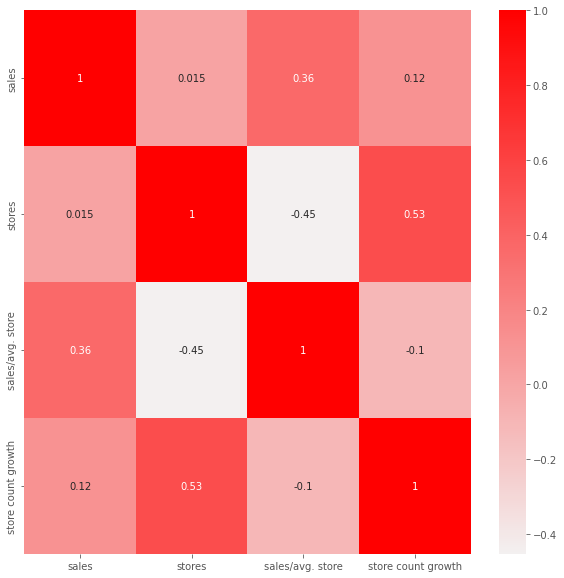


Coeficiente de correlación de Pearson entre ventas y tiendas es:
p =  0.015
Entoces no hay una correlacion alta entre causa y efecto para las dos variables ventas y tiendas


In [23]:
plt.figure(figsize=(10,10))
corr = df.corr()
cmap = sns.color_palette("light:red", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.show()

print('''
Coeficiente de correlación de Pearson entre ventas y tiendas es:
p =  0.015
Entoces no hay una correlacion alta entre causa y efecto para las dos variables ventas y tiendas''')


**Resultados:**
* no hay una correlacion alta entre causa y efecto para las dos variables ventas y tiendas


**Conclusiones:**
* Que una empresa tenga o aperture mas tiendas, no significa que tendra mas ventas.

### 5. ¿Cuál es el rango que existe entre las ventas?

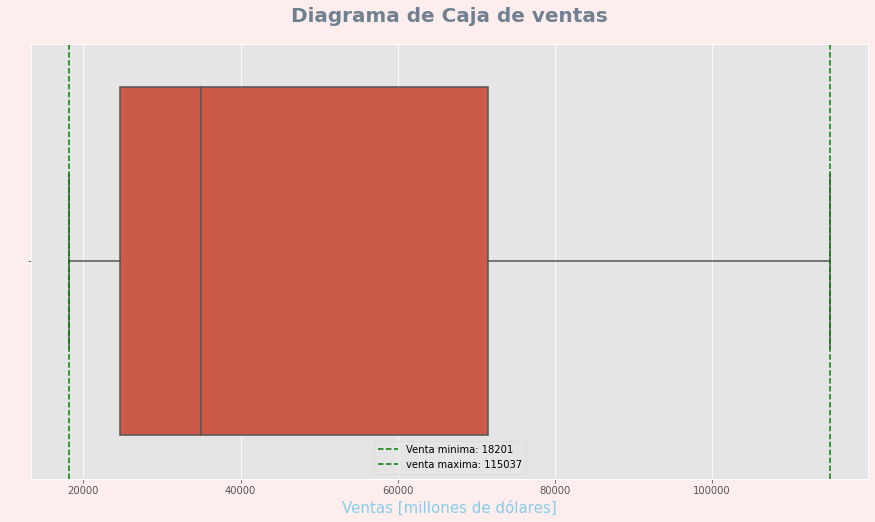

In [24]:
minimun_sale = df['sales'].min()
maximun_sale = df['sales'].max()

fig, ax = plt.subplots(facecolor = '#FDEDEC')
fig.set_size_inches(15, 8)
sns.boxplot(x = 'sales', data = df)
#sns.scatterplot(x = 'sales', y = 'company', data = df)
plt.axvline(minimun_sale, color="g", linestyle="--", label=f'Venta minima: {minimun_sale}')
plt.axvline(maximun_sale, color="g", linestyle="--", label=f'venta maxima: {maximun_sale}') 
plt.legend(loc='best')
plt.title('Diagrama de Caja de ventas', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center") 
plt.xlabel('Ventas [millones de dólares]', fontsize=15, color="skyblue")
plt.ylabel(' ')

plt.show()

In [25]:
minimun_sale = df['sales'].min()
maximun_sale = df['sales'].max()
range = maximun_sale - minimun_sale
print(f"El rango de ventas de todas la empresas es {range} millones de dolares")

El rango de ventas de todas la empresas es 96836 millones de dolares


**Resultados:**
* el rango de ventas sin contar a Walmart, que es el valor atipico, es 96836 millones de dolares


**Conclusiones:**
* se debe tener en cuenta que el rango es mejor calcularlo sin un valor atipico ya que generaria un sesgo en la presentación de datos

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

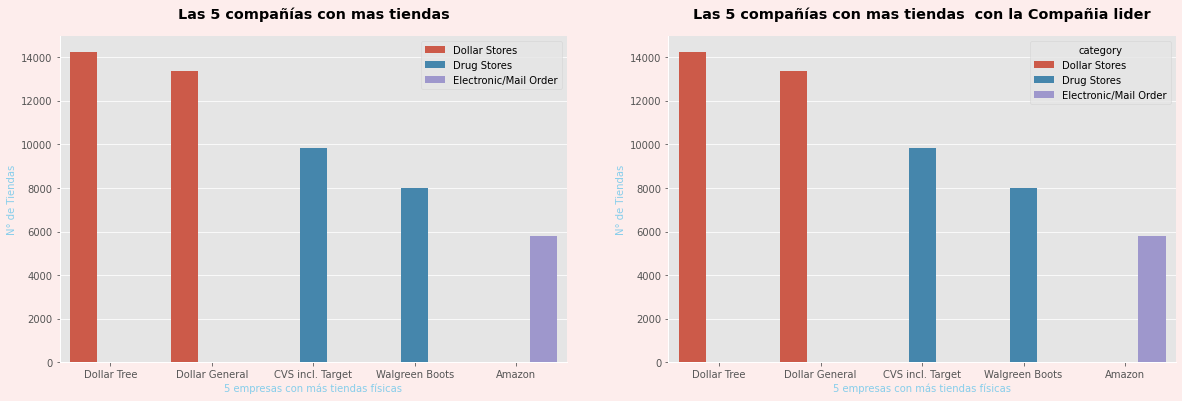

In [26]:
df_sorted_by_stores = df.sort_values('stores',ascending=0)
dataset_sorted_by_stores = dataset.sort_values('stores',ascending=0)

plt.figure(figsize=(20,6), facecolor = '#FDEDEC')
ax1 = plt.subplot(1,2,1)
sns.barplot(data=df_sorted_by_stores[:5],x='company',y='stores', hue='category',ax =ax1)
ax1.set_xlabel('5 empresas con más tiendas físicas', fontsize=10, color="skyblue")
ax1.set_ylabel('N° de Tiendas', fontsize=10, color="skyblue")
ax1.set_title('Las 5 compañías con mas tiendas', fontweight="bold", y=1.05, x=0.5, 
horizontalalignment="center", verticalalignment="center")
ax1.legend(loc='best')

ax2 = plt.subplot(1,2,2)
sns.barplot(data=dataset_sorted_by_stores[:5],x='company',y='stores', hue='category',ax=ax2)
ax2.set_xlabel('5 empresas con más tiendas físicas', fontsize=10, color="skyblue")
ax2.set_ylabel('N° de Tiendas', fontsize=10, color="skyblue")
ax2.set_title('Las 5 compañías con mas tiendas  con la Compañia lider', fontweight="bold", y=1.05, x=0.5, 
horizontalalignment="center", verticalalignment="center")
ax1.legend(loc='best')
sns.despine(right=True)
plt.style.use('ggplot')
plt.subplots_adjust(hspace=0.3)
plt.show()

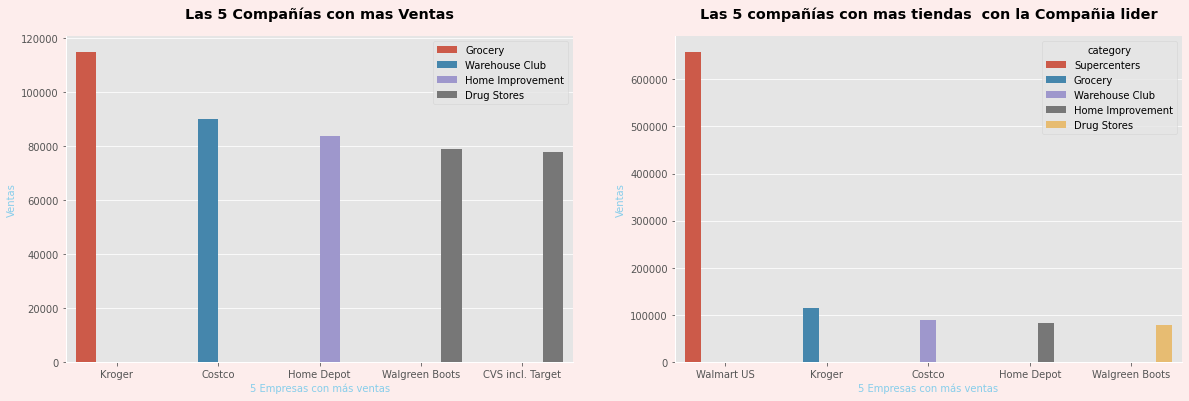

In [27]:
plt.figure(figsize=(20,6), facecolor = '#FDEDEC')
ax1 = plt.subplot(1,2,1)
sns.barplot(data=df[:5],x='company',y='sales', hue='category',ax =ax1)
ax1.set_xlabel('5 Empresas con más ventas', fontsize=10, color="skyblue")
ax1.set_ylabel('Ventas', fontsize=10, color="skyblue")
ax1.set_title('Las 5 Compañías con mas Ventas', fontweight="bold", y=1.05, x=0.5, 
horizontalalignment="center", verticalalignment="center")
ax1.legend(loc='best')

ax2 = plt.subplot(1,2,2)
sns.barplot(data=dataset[:5],x='company',y='sales', hue='category',ax=ax2)
ax2.set_xlabel('5 Empresas con más ventas', fontsize=10, color="skyblue")
ax2.set_ylabel('Ventas', fontsize=10, color="skyblue")
ax2.set_title('Las 5 compañías con mas tiendas  con la Compañia lider', fontweight="bold", y=1.05, x=0.5, 
horizontalalignment="center", verticalalignment="center")
ax1.legend(loc='best')
sns.despine(right=True)
plt.style.use('ggplot')
plt.subplots_adjust(hspace=0.3)
plt.show()

In [28]:
print(f"las 5 empresas que tienen mas tiendas son:")
for company, stores in zip(dataset_sorted_by_stores[:5]['company'].values, dataset_sorted_by_stores[:5]['stores'].values):
    print(f'{company}: {stores} tiendas', end=', ')

las 5 empresas que tienen mas tiendas son:
Dollar Tree: 14250 tiendas, Dollar General: 13350 tiendas, CVS incl. Target: 9813 tiendas, Walgreen Boots: 8002 tiendas, Amazon: 5792 tiendas, 

In [29]:
print(f"""
Caso 1: Sin empresa lider
las 5 empresas que mas tiendas tienen y que son de las 5 empresas que mas ventas tuvieron:""")
for company in df_sorted_by_stores[:5]['company'].values:
    if company in df[:5]['company'].values:
        print(company, end=', ')

print(f"""
Caso 2: Con empresa lider
las 5 empresas que mas tiendas tienen y que son de las 5 empresas que mas ventas tuvieron:""")
for company in dataset_sorted_by_stores[:5]['company'].values:
    if company in dataset[:5]['company'].values:
        print(company, end=', ')



Caso 1: Sin empresa lider
las 5 empresas que mas tiendas tienen y que son de las 5 empresas que mas ventas tuvieron:
CVS incl. Target, Walgreen Boots, 
Caso 2: Con empresa lider
las 5 empresas que mas tiendas tienen y que son de las 5 empresas que mas ventas tuvieron:
Walgreen Boots, 

**Resultados:**
* las 5 empresas que tienen mas tiendas son: **Dollar Tree, Dollar General, CVS incl. Target, Walgreen Boots, Amazon**
* las 5 empresas que mas tiendas tienen y que son de las 5 empresas que mas ventas tuvieron son: 
    * Caso 1: Sin empresa lider -> **CVS incl. Target, Walgreen Boots**
    * Caso 2: Con empresa lider -> **Walgreen Boots**

**Conclusiones:**
* Se debe recalcar que no todas las empresas con mas ventas tienen mas ventas
* la categoria con mas venta sin el outlier es Grocery


## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [30]:
df['category'].value_counts()

Grocery                  7
Drug Stores              3
Home Improvement         2
Electronic/Mail Order    2
Department Stores        2
Dollar Stores            2
Warehouse Club           1
Supercenters             1
Warehouse Clubs          1
Electronics              1
Apparel                  1
Name: category, dtype: int64

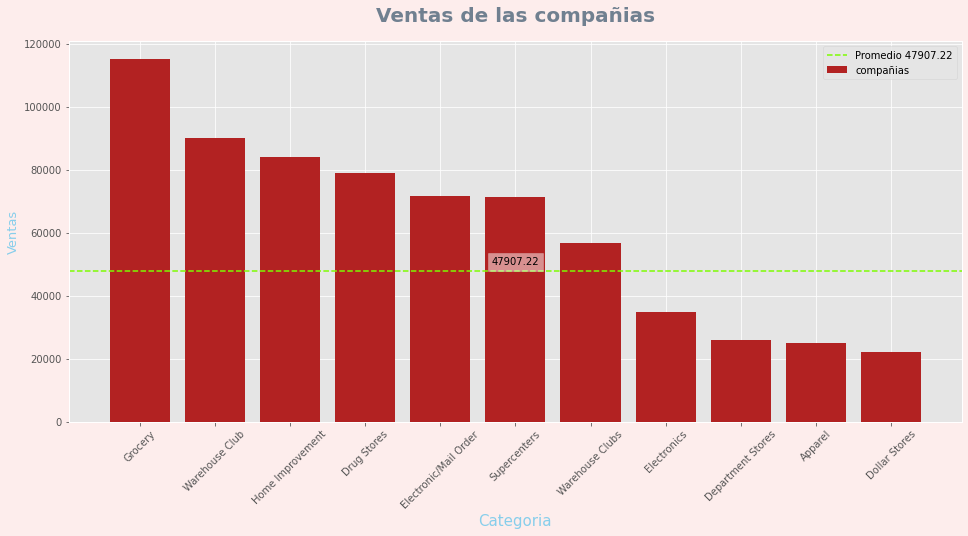

In [31]:
plt.style.use('ggplot')
category_names = df['category'].values
sales = df['sales'].values
mean = round(df['sales'].mean(),2)

fig, axis = plt.subplots(facecolor = '#FDEDEC')
fig.set_size_inches(16, 7)
axis.bar(category_names, sales, color="firebrick", label='compañias')
#axis.plot(category_names, sales, color="red", label='ventas')
plt.axhline(sales.mean(), color="lawngreen", linestyle="--", label=f'Promedio {mean}')
plt.xticks(rotation=45)
plt.legend()
axis.text(
    10/2, sales.mean() + 2000, mean, 
    horizontalalignment="center",bbox = dict(facecolor = 'white', alpha = .5))
plt.xlabel('Categoria', fontsize=15, color="skyblue")
plt.ylabel('Ventas', fontsize=13, color="skyblue")
plt.title('Ventas de las compañias', fontsize=20, color="slategrey", fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.show()

In [32]:
df.max()

company                Walgreen Boots
sales                          115037
stores                          14250
sales/avg. store                187.8
store count growth            0.25566
category              Warehouse Clubs
dtype: object

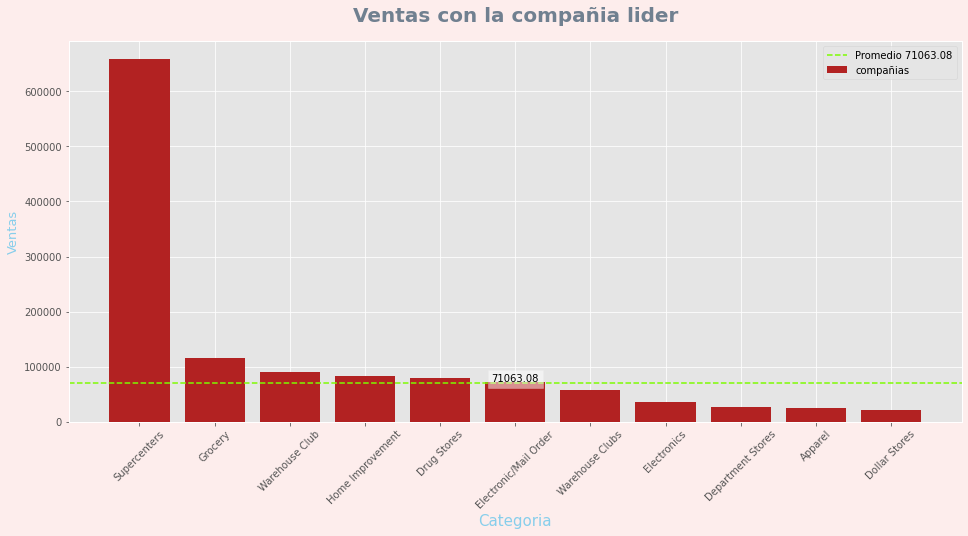

In [33]:
plt.style.use('ggplot')
category_names = dataset['category'].values
sales = dataset['sales'].values
mean = round(dataset['sales'].mean(),2)

fig, axis = plt.subplots(facecolor = '#FDEDEC')
fig.set_size_inches(16, 7)
axis.bar(category_names, sales, color="firebrick", label='compañias')
#axis.plot(category_names, sales, color="red", label='ventas')
plt.axhline(sales.mean(), color="lawngreen", linestyle="--", label=f'Promedio {mean}')
plt.xticks(rotation=45)
plt.legend()
axis.text(
    10/2, sales.mean() + 2000, mean, 
    horizontalalignment="center",bbox = dict(facecolor = 'white', alpha = .5))
plt.xlabel('Categoria', fontsize=15, color="skyblue")
plt.ylabel('Ventas', fontsize=13, color="skyblue")
plt.title('Ventas con la compañia lider', fontsize=20, color="slategrey", fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.show()

In [34]:
print(f"""
Caso 1: Sin compañia lider
la categoria con mas ventas:""")
df_category = df.groupby('category').sum().sort_values(by=['sales'],ascending=False)
df_category[:2]


Caso 1: Sin compañia lider
la categoria con mas ventas:


,sales,stores,sales/avg. store,store count growth
category,,,,
Grocery,297164,12026,207.6,0.15749
Drug Stores,184202,22368,24.6,0.24143


In [35]:
print(f"""
Caso 2: Con compañia lider
la categoria con mas ventas:""")
df_category_with_leader_company = dataset.groupby('category').sum().sort_values(by=['sales'],ascending=False)
df_category_with_leader_company[:1]


Caso 2: Con compañia lider
la categoria con mas ventas:


,sales,stores,sales/avg. store,store count growth
category,,,,
Supercenters,745919,6577,180.3,0.08729


**Resultados:**
* la categoria con mas ventas con la empresa lider: **Grocery** con **297164** millones de dolares de venta
* la categoria con mas ventas sin la empresa lider: **Supercenters** con **745919**  millones de dolares de venta
* 7 de las compañias son de la categoria Grocery
* Solo hay 1 compañia en la categoria **Warehouse Clubs** con 184202 millones de dolares de venta



**Conclusiones:**
* los **Supercenters** son los supermercado los cuales tienen todo tipo de productos, razon por la que esta categoria genera mas ventas.
* La mejor opcion para invertir es en la categoria Warehouse Clubs debido a la poca existencia de empresas


### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

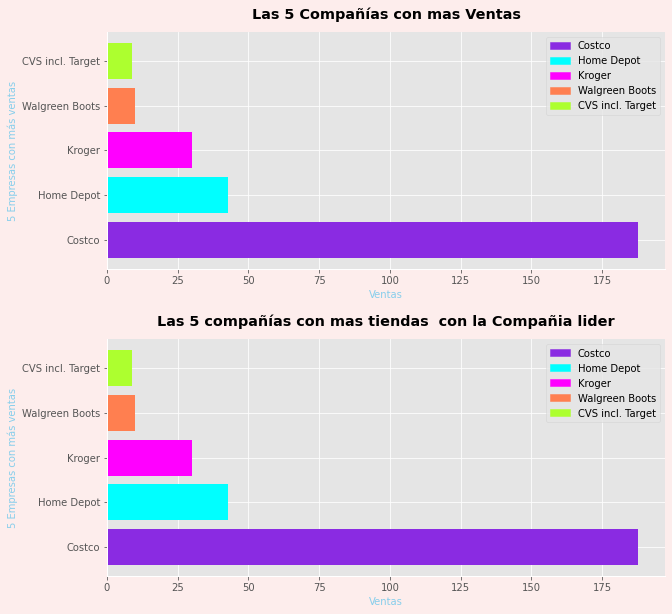

In [36]:
df_sorted = df[:5].sort_values(by=['sales/avg. store'], ascending=False)

plt.figure(figsize=(10,10), facecolor = '#FDEDEC')
colors = {'Costco':'blueviolet', 'Home Depot':'cyan', 
        'Kroger':'magenta','Walgreen Boots':'coral', 'CVS incl. Target':'greenyellow'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax1 = plt.subplot(2,1,1)
ax1.barh(y=df_sorted['company'],width=df_sorted['sales/avg. store'], color=list(colors.values()))
ax1.set_xlabel('Ventas', fontsize=10, color="skyblue")
ax1.set_ylabel('5 Empresas con más ventas', fontsize=10, color="skyblue")
ax1.set_title('Las 5 Compañías con mas Ventas', fontweight="bold", y=1.05, x=0.5, 
horizontalalignment="center", verticalalignment="center")
ax1.legend(handles, labels, loc='best')

dataset_sorted = df[:5].sort_values(by=['sales/avg. store'], ascending=False)
ax2 = plt.subplot(2,1,2)
ax2.barh(y=dataset_sorted['company'], width=dataset_sorted['sales/avg. store'], color=list(colors.values()))
ax2.set_xlabel('Ventas', fontsize=10, color="skyblue")
ax2.set_ylabel('5 Empresas con más ventas', fontsize=10, color="skyblue")
ax2.set_title('Las 5 compañías con mas tiendas  con la Compañia lider', fontweight="bold", y=1.05, x=0.5, 
horizontalalignment="center", verticalalignment="center")
ax2.legend(handles, labels, loc='best')
sns.despine(right=True)
plt.style.use('ggplot')
plt.subplots_adjust(hspace=0.3)
plt.show()

In [37]:
df_sorted

,company,sales,stores,sales/avg. store,store count growth,category
2,Costco,90048,495,187.8,0.06681,Warehouse Club
3,Home Depot,83976,1965,42.7,0.00000,Home Improvement
1,Kroger,115037,3931,30.0,0.05389,Grocery
4,Walgreen Boots,78924,8002,9.8,-0.01051,Drug Stores
5,CVS incl. Target,77792,9813,8.8,0.25566,Drug Stores


**Resultados:**
* la compañia que con relacion a la cantidad de tiendas genera mas ventas es : Costco


**Conclusiones:**
* **Costco** es la compañia con mas ventas por tienda porque es la unica que compite en su propia categoria **Warehouse Club**

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [38]:
df_online = df[df['category']=='Electronic/Mail Order']
print("""
Venta de las Compañias Online:
""")

for company,sale in zip(df_online['company'].values,df_online['sales'].values):
    print(f'{company}: {sale}', end=', ')


Venta de las Compañias Online:

Amazon: 71687, Apple incl. Online: 37664, 

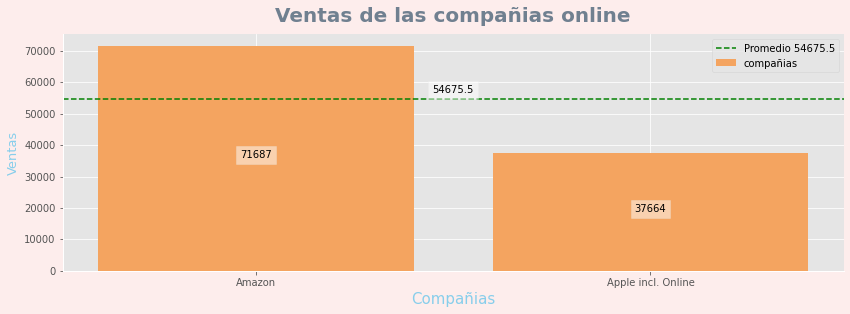

In [39]:
def addlabels(x,y):
    for i in np.arange(len(x)):
        plt.text(i, y[i]//2,y[i], horizontalalignment="center",
                 bbox = dict(facecolor = 'white', alpha = .5), rotation=0)

plt.style.use('ggplot')
company_names = df_online['company'].values
sales = df_online['sales'].values
mean = round(df_online['sales'].mean(),2)

plt.figure(figsize=(14,10), facecolor = '#FDEDEC')
ax1 = plt.subplot(2,1,1)
ax1.bar(company_names, sales, color="sandybrown", label='compañias')
ax1.axhline(sales.mean(), color="green", linestyle="--", label=f'Promedio {mean}')
ax1.legend()
ax1.text(
    0.5, sales.mean() + 2000, mean, 
    horizontalalignment="center",bbox = dict(facecolor = 'white', alpha = .5))
ax1.set_xlabel('Compañias', fontsize=15, color="skyblue")
ax1.set_ylabel('Ventas', fontsize=13, color="skyblue")
ax1.set_title('Ventas de las compañias online', fontsize=20, color="slategrey", fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
addlabels(company_names, sales)
sns.despine(right=True)
plt.subplots_adjust(hspace=0.3)
plt.show()


In [40]:
df_with_stores = df[df['category']!='Electronic/Mail Order']
print("""
Venta de las Compañias con Tiendas Fisicas:
""")

for company,sale in zip(df_with_stores['company'].values,df_with_stores['sales'].values):
    print(f'{company}: {sale}')


Venta de las Compañias con Tiendas Fisicas:

Kroger: 115037
Costco: 90048
Home Depot: 83976
Walgreen Boots: 78924
CVS incl. Target: 77792
Target: 71208
Lowe's: 60311
Albertsons: 56829
Sam's Club: 56828
Best Buy: 34980
Publix: 34408
Rite Aid: 27486
Ahold: 26903
Macy's: 26028
TJX: 25012
Aldi: 24402
Dollar General: 22234
Dollar Tree: 21464
HEB: 21384
Kohl's: 19060
Delhaize: 18201


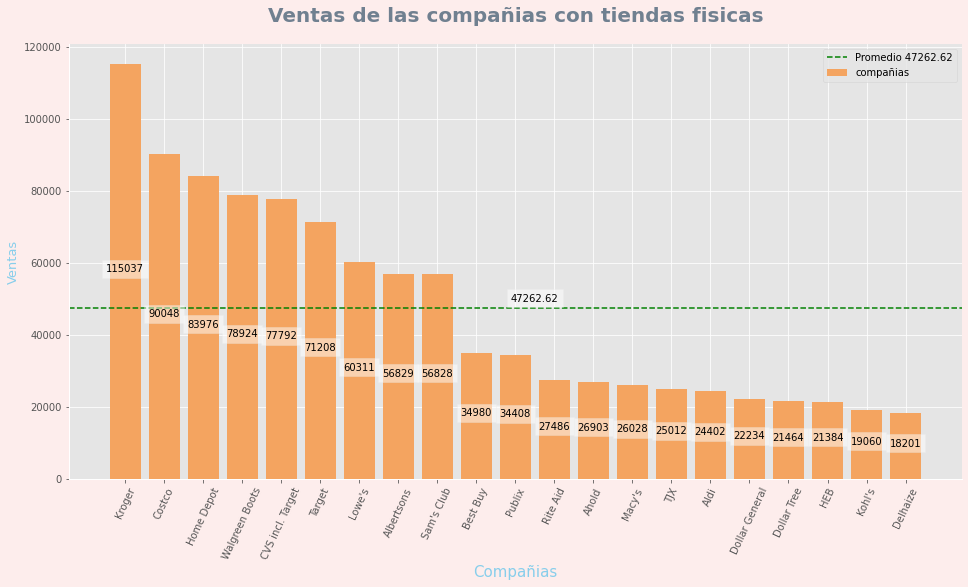

In [41]:
def addlabels(x,y):
    for i in np.arange(len(x)):
        plt.text(i, y[i]//2,y[i], horizontalalignment="center",
                 bbox = dict(facecolor = 'white', alpha = .5), rotation=0)


company_names = df_with_stores['company'].values
sales = df_with_stores['sales'].values
mean = round(df_with_stores['sales'].mean(),2)

plt.figure(figsize=(16,8), facecolor = '#FDEDEC')
ax2 = plt.subplot(1,1,1)
ax2.bar(company_names, sales, color="sandybrown", label='compañias')
ax2.axhline(sales.mean(), color="green", linestyle="--", label=f'Promedio {mean}')
ax2.legend()
ax2.text(
    21/2, sales.mean() + 2000, mean, 
    horizontalalignment="center",bbox = dict(facecolor = 'white', alpha = .5))
ax2.set_xlabel('Compañias', fontsize=15, color="skyblue")
ax2.set_ylabel('Ventas', fontsize=13, color="skyblue")
ax2.set_title('Ventas de las compañias con tiendas fisicas', fontsize=20, color="slategrey", fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
ax2.tick_params(axis='x', rotation=65)
addlabels(company_names, sales)
sns.despine(right=True)
plt.subplots_adjust(hspace=0.3)
plt.show()

**Resultados:**
* las unicas compañias online son: 
    * **Amazon:** 71687 millones de dolares en ventas
    * **Apple incl. Online:** 37664 millones de dolares en ventas
* las compañias con ventas online no superan las compañias con tiendas fisicas.

**Conclusiones:**
* saber la ventas no es el mejor indice para verificar si es rentable un negocio, para ello se debe calcular la ganancia neta.

## III. Preguntas adicionales

### 10. ¿Que representa la Tasa de Crecimiento de las compañias?

**Resultados:**



**Conclusiones:**


### 11. ¿Existe una relacion entre la tasa de crecimiento de tiendas y las ventas?

**Resultados:**


**Conclusiones:**

### 12. Pregunta

**Resultados:**


**Conclusiones:**


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9312602b-e77f-42bf-b1f9-9ddfe915a1e6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>